# Programming with Python MOD007891 
## Assessment Element 010 (Weighting = 100%)


### Nellie Vo - SID 2179088

# Section 1:  (Analysis of Diabetic Patient Data) - (Weighting = 30%)

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases.** The dataset consist of several medical predictor **(independent)** variables and one target **(dependent)** variable, Outcome. 

Independent variables include:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- Two-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Outcome: Class variable (0 or 1).


#### Upload the provided dataset (diabetes.csv) into your Jupyter Notebook working directory and then complete the following tasks.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
dbts = pd.read_csv('Dataset/diabetes.csv')

In [2]:
# Let's look at the first few rows
dbts.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 1. Identify the total number of records? 

In [3]:
dbts.shape[0] #shape is (rows, columns), shape[0] returns rows

768

### 2. Display data types for all columns? 

In [4]:
dbts.dtypes #return data type of each column

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### 3.  Check the dataset for the missing values? 

In [5]:
dbts[dbts.isna() == True].count() #check if any column has missing value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 4. Display descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset such as total count, min, max, standard deviation, max and quartiles?

In [6]:
dbts.describe() #return descriptive stats of each column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As you probably have noticed, many columns have a **minimum value of 0** which is clearly not logical. Those are essentially **missing values** in our dataset. 



### 5. Identify columns with missing values and find out their frequency? 

In [7]:
dbts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
nonzero_independents = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
independents = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dbts

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
#pregnancies & outcome can be zero, others can't -> check for 0 in following columns:
dbts[nonzero_independents][dbts.isin({0})].count()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

### 6. Identify the number of positive and negative patients based on target (dependent) variable, outcome? Plot the frequencies using a bar chart?

Positive outcomes:  268
Negative outcomes:  500


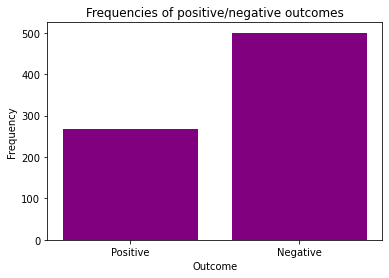

In [10]:
positive = (dbts['Outcome']==1).sum() #total number of positive outcomes calculated by testing (Outcome = 1), if True -> +1
negative = (dbts['Outcome']==0).sum() ##total number of negative outcomes calculated by testing (Outcome = 0), if True -> +1
print('Positive outcomes: ', positive)
print('Negative outcomes: ', negative)

#plotting frequencies
x = ['Positive', 'Negative']
outcome = [positive, negative]

plt.bar(x, outcome, color='purple')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Frequencies of positive/negative outcomes')


plt.show()

### 7. Display correlation among all dependent and independent variables using the correlation matrix? Illustrate correlation data using a heatmap plot?  

In [11]:
dbts.corr() #correlation matrix showing correlation among all dependent and independent variables

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

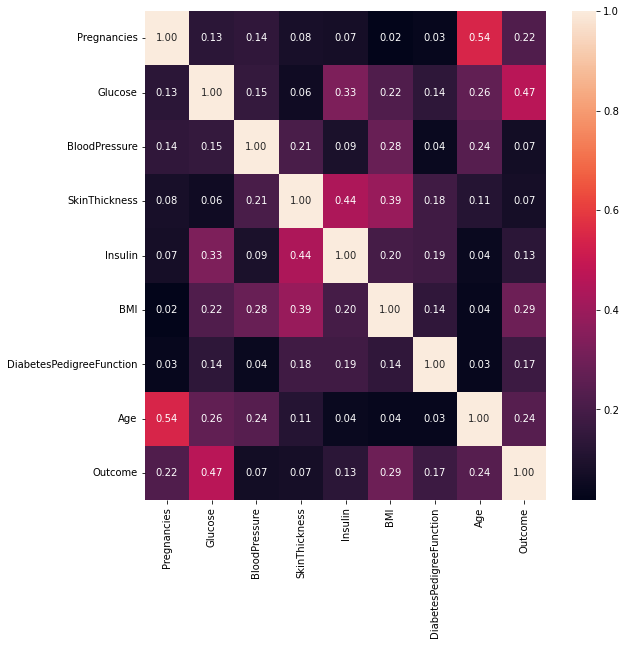

In [12]:
#plotting heatmap
plt.figure(figsize=(9,9))
sns.heatmap((np.abs(dbts.corr())), annot=True, fmt='0.2f')

We have observed earlier that missing values in this dataset are represented by 0. This is clearly not a good practice and negatively impacts our data analysis. 



### 8. Replace these zero values with NAN?

In [13]:
dbts[nonzero_independents] = dbts[nonzero_independents].replace({0:np.NaN}) #replace 0s in nonzero columns with NaN
dbts

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


### 9. Check out the variables for 0 value once again?  

In [14]:
dbts[dbts.isin({0})].count() #problem doesn't specify what variables, so check all by counting 0s

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [15]:
#but it's only necessary to check nonzero variables
dbts[nonzero_independents][dbts[nonzero_independents].isin({0})].count() 

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

### 10. Check out the missing values counts per variable?

In [16]:
dbts.isna().sum() #check all columns for NaN

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### 11. Identify the mean value for each variable? 

In [17]:
dbts.mean() #calculate mean of all columns

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

### 12. For the following columns, fill missing values with mean column values?  
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [18]:
#create function for replacing NaN with mean
def fill_mean(x):
    dbts[x].replace({np.NaN:dbts[x].mean()}, inplace=True)

In [19]:
#run loop for all nonzero independent variables
for x in nonzero_independents:
    fill_mean(x)
dbts

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


### 13. Display descriptive statistics and checkout the min values of the aforementioned columns once again? Any ZEROS? 

In [20]:
dbts[nonzero_independents].describe() #return descriptive stats of each column

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [21]:
dbts[nonzero_independents].min() #return minimum value of each column

Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
dtype: float64

In [22]:
dbts[nonzero_independents].min() == 0 #return True if any minimum value is 0

Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
dtype: bool

### 14. Check out the missing values counts per variable, once again? 

In [23]:
dbts[dbts.isnull() == True].count() #check all columns for missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 15. Plot data distribution of each variable? Explain your thoughts?

C:\Users\ngoc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ngoc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ngoc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

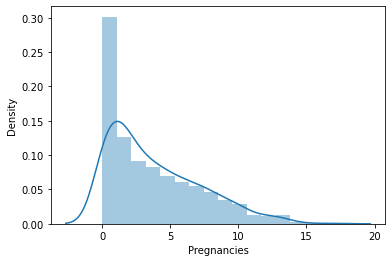

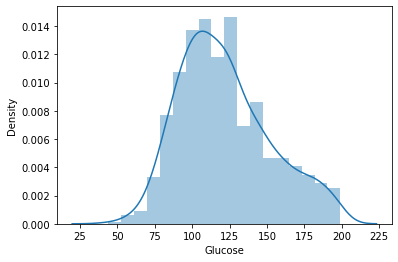

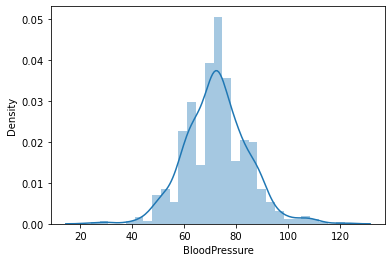

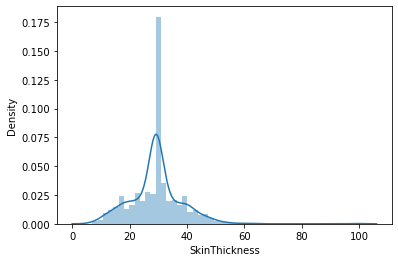

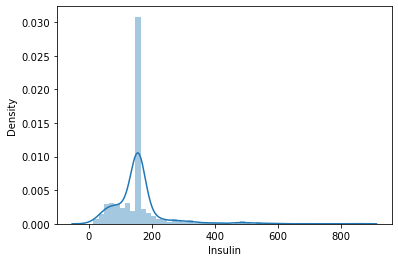

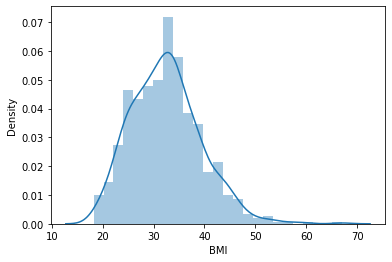

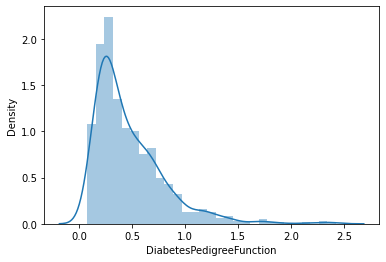

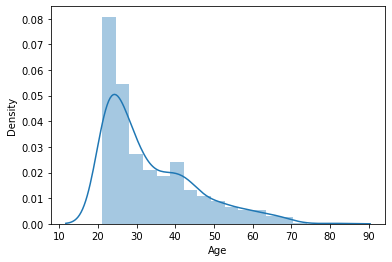

In [24]:
#plotting distribution of data in each column:
for i in independents:
    plt.figure(i)
    sns.distplot(dbts[i])

The range is not discussed in this part because it is presented with accurate numbers by descriptive statistics in question 13.

Pregnancies's plot is right skewed, with the count of records going down as number of pregnancies goes up. The highest proportion of records falls in the [0,2.5] bin.

Glucose's plot has close-to-symmetrical distribution, with most of the records fall in the upper half bin. The highest proportion of records falls in the [100,125] bin.

BloodPressure's plot also has close-to-symmetrical distribution. The highest proportion of records falls in the [70,80] bin.

SkinThickness's plot also has almost symmetrical distribution. Exceptional number of observations are close to 30s. This is because we replaced 227 observations with the mean in question 12.

Insulin's plot also has close-to-symmetrical distribution. Exceptional number of observations are close to 150s. This is because we replaced 374 observations with the mean in question 12.

BMI's plot is almost symmetrical. The highest proportion of records falls in the [30,40] bin.

DiabetesPedigreeFunction's plot is positively skewed. The highest proportion of records falls in the [0.1,0.2] bin.

Age's plot is right skewed, with the count of records going down as age goes up. The highest proportion of records falls in the [20,30] bin.

A **Boxplot** is a method for graphically depicting groups of numerical data through their quartiles. 

### 16. Plot the Boxplot for each variable? Interpret the diagrams?

C:\Users\ngoc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ngoc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ngoc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ngoc\anaconda3\lib\site-p

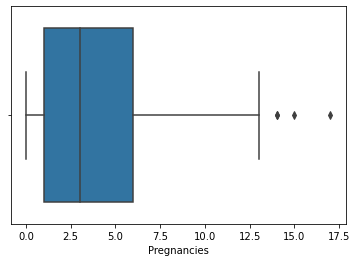

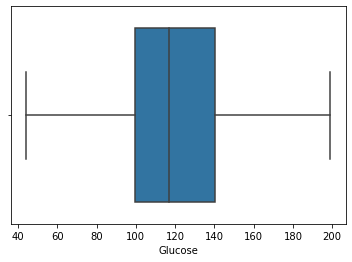

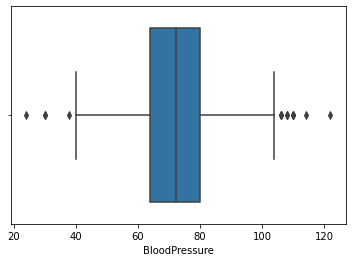

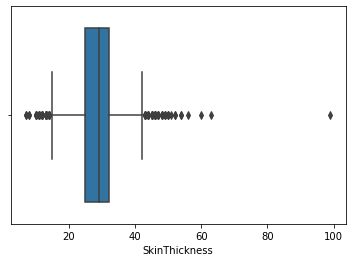

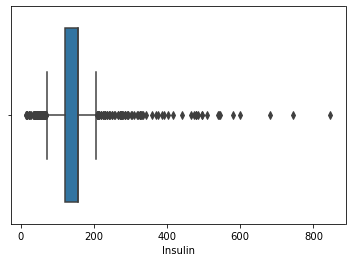

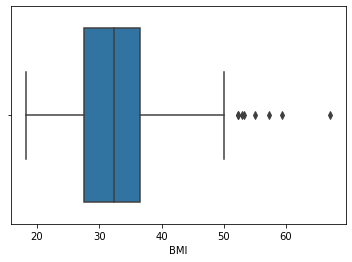

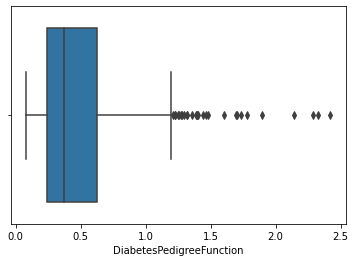

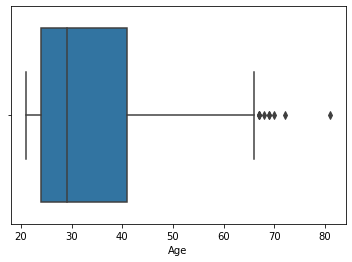

In [25]:
#plotting boxplot of data in each column:
for i in independents:
    plt.figure()
    sns.boxplot(dbts[i])

The boxplots plots the numbers from the descriptive statistics table in question 13, with minimum, Q1, median, Q3, maximum, and outliers (if any). The boxplot does not take minimum & maximum values from the table though, they are calculated as:

Min = Q1 - 1.5IQR

Max = Q3 + 1.5IQR

with IQR = Q3 - Q1.

Values that fall out of the interval [Min, Max] calculated are considered outliers.

<AxesSubplot:>

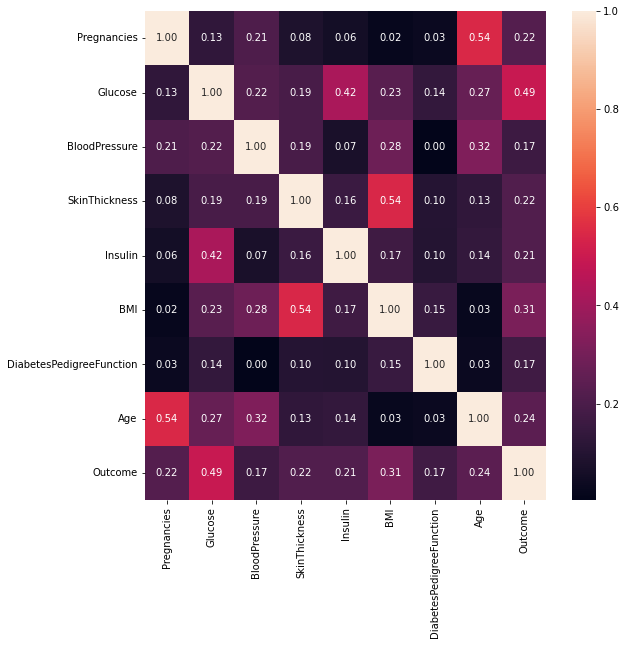

In [26]:
#plotting heatmap
plt.figure(figsize=(9,9))
sns.heatmap((np.abs(dbts.corr())), annot=True, fmt='0.2f')

### 17. Plot demographic and distribution of diabetics/nondiabetics across age variable?

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

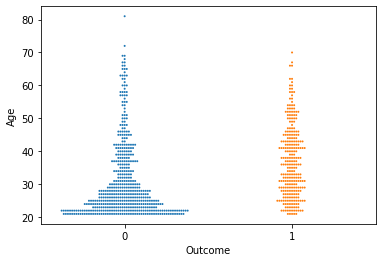

In [27]:
#plotting distribution of outcomes across demographic data, i.e. age:
sns.swarmplot(x='Outcome', y='Age', data=dbts, size=2, alpha=1)

### 18. Investigate how the number of pregnancies impacts diabetes? Demonstrate the relationship with a plot?

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

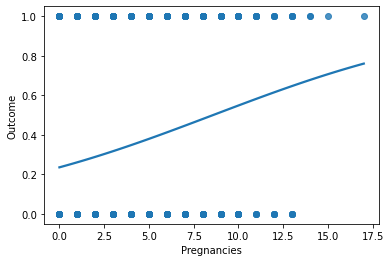

In [28]:
#Pregnancies is discrete number of times, Outcome is binary 0/1. To find the curve that best describes this type of the behaviour of data is logistic regression. 
pregnancy=dbts['Pregnancies']
outcome=dbts['Outcome']
sns.regplot(x=pregnancy, y=outcome, logistic=True, ci=None)

### 19. Check if there are any outliers in our dataset. Any data point outside 25% and 75% quarters can be considered an outlier. Remove the outliers from our dataset. 

In [29]:
dbts_no_outlier = pd.DataFrame()
for i in range(dbts.shape[1]):
    col = dbts.iloc[:,i]
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)   
    col=pd.DataFrame(col)
    col.iloc[:,0] = col.iloc[:,0].apply(lambda x: x if (x>=q1 and x<=q3) else np.NaN)
    dbts_no_outlier = pd.concat([dbts_no_outlier, col], axis=1)
    i+=1
dbts_no_outlier

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,NaN,155.548223,33.6,NaN,NaN,1
1,1.0,NaN,66.0,29.00000,155.548223,NaN,0.351,31.0,0
2,NaN,NaN,64.0,29.15342,155.548223,NaN,NaN,32.0,1
3,1.0,NaN,66.0,NaN,NaN,28.1,NaN,NaN,0
4,NaN,137.0,NaN,NaN,NaN,NaN,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,NaN,101.0,76.0,NaN,NaN,32.9,NaN,NaN,0
764,2.0,122.0,70.0,27.00000,155.548223,NaN,0.340,27.0,0
765,5.0,121.0,72.0,NaN,NaN,NaN,0.245,30.0,0
766,1.0,126.0,NaN,29.15342,155.548223,30.1,0.349,NaN,1


In [30]:
dbts_no_outlier.isna().sum()

Pregnancies                 280
Glucose                     384
BloodPressure               323
SkinThickness               372
Insulin                     339
BMI                         376
DiabetesPedigreeFunction    384
Age                         345
Outcome                       0
dtype: int64

In [31]:
dbts_dropna_any = dbts_no_outlier.dropna(how='any')
dbts_dropna_any.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,168,4.0,110.0,66.0,29.15342,155.548223,31.9,0.471,29.0,0
1,233,4.0,122.0,68.0,29.15342,155.548223,35.0,0.394,29.0,0
2,366,6.0,124.0,72.0,29.15342,155.548223,27.6,0.368,29.0,1
3,641,4.0,128.0,70.0,29.15342,155.548223,34.3,0.303,24.0,0
4,683,4.0,125.0,80.0,29.15342,155.548223,32.3,0.536,27.0,1


In [32]:
dbts_no_outlier.dropna(thresh=0)
#thresh: int, optional
#require that many non-NA values. Cannot be combined with how.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,NaN,155.548223,33.6,NaN,NaN,1
1,1.0,NaN,66.0,29.00000,155.548223,NaN,0.351,31.0,0
2,NaN,NaN,64.0,29.15342,155.548223,NaN,NaN,32.0,1
3,1.0,NaN,66.0,NaN,NaN,28.1,NaN,NaN,0
4,NaN,137.0,NaN,NaN,NaN,NaN,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,NaN,101.0,76.0,NaN,NaN,32.9,NaN,NaN,0
764,2.0,122.0,70.0,27.00000,155.548223,NaN,0.340,27.0,0
765,5.0,121.0,72.0,NaN,NaN,NaN,0.245,30.0,0
766,1.0,126.0,NaN,29.15342,155.548223,30.1,0.349,NaN,1


### 20. Create a new categorical variable based on BMI using the following criteria. Name the new variable “BMI_tier” and add it to our dataset as a new column. 

- BMI = 0  then “NA”
- 0 < BMI < 18.5 then “Under Weight”
- 18.5 <= BMI < 25 then “Normal”
- 25 <= BMI < 30 then “Overweight” 
- 30 <= BMI then “Obese”


In [33]:
#create function to apply rules for generating BMI_tier column
def BMI_to_tier(x):
    if x == 0: return 'NA'
    if 0<x<18.5: return 'Underweight'
    if 18.5<=x<25: return 'Normal'
    if 25<=x<30: return 'Overweight'
    if x>=30: return 'Obese'
    
#apply function with data from column BMI, put results in a new column named BMI_tier
dbts['BMI_tier'] = dbts['BMI'].apply(BMI_to_tier)
dbts['BMI_tier']

0           Obese
1      Overweight
2          Normal
3      Overweight
4           Obese
          ...    
763         Obese
764         Obese
765    Overweight
766         Obese
767         Obese
Name: BMI_tier, Length: 768, dtype: object

### 21. Plot the BMI_tier histogram?  

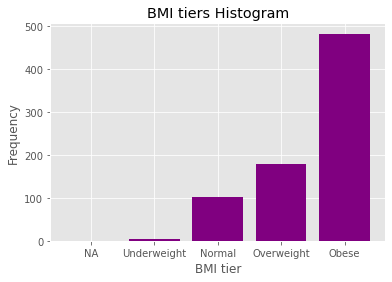

In [34]:
#count frequency of each tier in column BMI_tier by testing & summing booleans
NA = (dbts['BMI_tier']=='NA').sum()
underweight = (dbts['BMI_tier']=='Underweight').sum()
normal = (dbts['BMI_tier']=='Normal').sum()
overweight = (dbts['BMI_tier']=='Overweight').sum()
obese = (dbts['BMI_tier']=='Obese').sum()

#plotting BMI_tier histogram
plt.style.use('ggplot')
x = ['NA', 'Underweight', 'Normal', 'Overweight', 'Obese']
outcome = [NA, underweight, normal, overweight, obese]
plt.bar(x, outcome, color='purple')
plt.xlabel('BMI tier')
plt.ylabel('Frequency')
plt.title('BMI tiers Histogram')

plt.show()

### 22. How many obese individuals exist in our dataset?  Use  Piechart to illustrate the proportion of each BMI tier? 

In [35]:
obese #call result of Obese tier count in question 21

483

<AxesSubplot:ylabel='BMI_tier'>

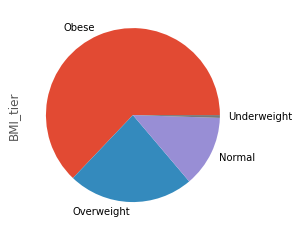

In [36]:
#plotting BMI_tier pie chart
dbts.BMI_tier.value_counts().plot(kind='pie')

### 23. Create a new categorical variable based on Oral Glucose Tolerance Test (Glucose) using the following criteria, suggested by DIABETES UK. Name the new variable “OGTT_tier” and add it to our dataset as a new column. 

- Glucose == 0 then “NA”
- Glucose < 140 then “Normal”
- 140 <= Glucose < 198 then “Impaired Glucose Tolerance”
- 198 <= Glucose then “Diabetic Level”


In [37]:
#create function to apply rules for generating OGTT_tier column
def glucose_to_tier(x):
    if x == 0: return 'NA'
    if 0<x<140: return 'Normal'
    if 140<=x<198: return 'Impaired Glucose Tolerance'
    if x>=198: return 'Diabetic Level'

#apply function with data from column Glucose, put results in a new column named OGTT_tier
dbts['OGTT_tier'] = dbts['Glucose'].apply(glucose_to_tier)
dbts['OGTT_tier']

0      Impaired Glucose Tolerance
1                          Normal
2      Impaired Glucose Tolerance
3                          Normal
4                          Normal
                  ...            
763                        Normal
764                        Normal
765                        Normal
766                        Normal
767                        Normal
Name: OGTT_tier, Length: 768, dtype: object

### 24.How many individuals are categorized as “Diabetic Level” in our newly created variable, “OGTT_tier”?  Plot the “OGTT_tier” histogram?   

In [38]:
#count frequency of Diabetic Level in column OGTT_tier by testing & summing booleans
(dbts['OGTT_tier']=='Diabetic Level').sum()

2

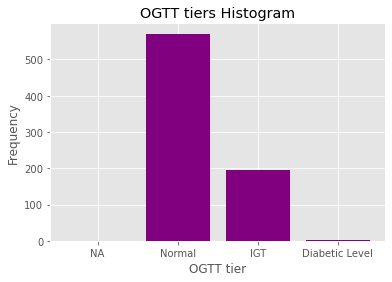

In [39]:
#count frequency of each tier in column OGTT_tier by testing & summing booleans
NA = (dbts['OGTT_tier']=='NA').sum()
normal = (dbts['OGTT_tier']=='Normal').sum()
impaired = (dbts['OGTT_tier']=='Impaired Glucose Tolerance').sum()
diabetic = (dbts['OGTT_tier']=='Diabetic Level').sum()

#plotting OGTT_tier histogram
plt.style.use('ggplot')
x = ['NA', 'Normal', 'IGT', 'Diabetic Level']
outcome = [NA, normal, impaired, diabetic]
plt.bar(x, outcome, color='purple')
plt.xlabel('OGTT tier')
plt.ylabel('Frequency')
plt.title('OGTT tiers Histogram')

plt.show()

### 25. Out of those who categorized as “Impaired Glucose Tolerance”, how many of them are actually diabetes? What about those with “Normal” OGTT_tier?  

In [40]:
#pull OGTT_tier & Outcome columns
dbts[['OGTT_tier', 'Outcome']]

,OGTT_tier,Outcome
0,Impaired Glucose Tolerance,1
1,Normal,0
2,Impaired Glucose Tolerance,1
3,Normal,0
4,Normal,1
...,...,...
763,Normal,0
764,Normal,0
765,Normal,0
766,Normal,1


In [41]:
#count number of lines satisfying both conditions
len(dbts[(dbts.Outcome==1) & (dbts.OGTT_tier=='Normal')])

133

In [42]:
#count number of lines satisfying both conditions
len(dbts[(dbts.Outcome==1) & (dbts.OGTT_tier=='Impaired Glucose Tolerance')])

133

# Section 2:  (2021  Tokyo Olympics) - (Weighting = 30%)

In this task we work with 2021 Tokyo summer Olympics dataset. This contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021(2020) Tokyo Olympics. This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [43]:
athlete_data = pd.read_excel("Dataset/Athletes.xlsx")
coach_data = pd.read_excel("Dataset/Coaches.xlsx")
gender_data = pd.read_excel("Dataset/EntriesGender.xlsx")
medal_data = pd.read_excel("Dataset/Medals.xlsx")
team_data = pd.read_excel("Dataset/Teams.xlsx")

C:\Users\ngoc\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [44]:
# Let's look at the first few rows for each table

In [45]:
athlete_data.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [46]:
coach_data.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [47]:
gender_data.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [48]:
medal_data.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [49]:
team_data.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


### 1. Which countries do most athletes come from? Plot a descendingly ordered bar plot to show athletes counts based on their country of origin? 

In [50]:
#count number of athletes across countries
athlete_data['NOC'].value_counts().head()

United States of America      615
Japan                         586
Australia                     470
People's Republic of China    401
Germany                       400
Name: NOC, dtype: int64

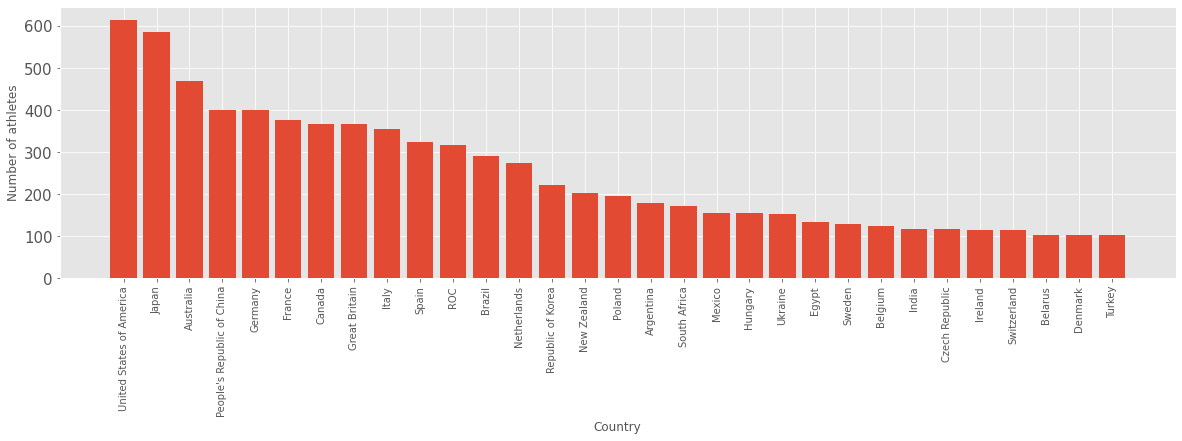

In [51]:
#plotting number of athletes across countries, taking first 30 countries with the most athletes
y = athlete_data.NOC.value_counts().values[0:31]
x = athlete_data.NOC.value_counts().index[0:31]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel('Country')
plt.ylabel('Number of athletes')
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=15)
plt.show()

### 2. Which country has the most female athletes? Plot a descendingly ordered bar plot to show female athletes counts based on their country of origin?

The idea is that from the data provided, we can calculate proportion of female athletes across disciplines (using gender_data); and by multiply that proportion with the number of athletes participating in that discipline in a country (using athlete_data), we have the number of female athletes participating in that discipline in such country. Finally, we group by NOC (country) to get the total number of female athletes (participating in all disciplines) in each country.

For example: Using athlete_data, counting athletes [coming from USA & participating in Archery] returns 4. Female proportion of Archery is 0.5 calculated from gender_data. Then, there are 2 (4x0.5) female athletes coming from USA & participating in Archery. After doing the same for all disciplines, we sum them up (group by USA) and end up with total number of female athletes from USA.

This method definitely does not provide the exact number, but the estimated number of female athletes based on the fact that gender's only basis supported by the given dataset is discipline.

In [52]:
#count number of athletes across each discipline for each country (using athlete_data)
count_athletes = athlete_data.groupby(['NOC', 'Discipline']).count() 
count_athletes = count_athletes.reset_index()
count_athletes

,NOC,Discipline,Name
0,Afghanistan,Athletics,2
1,Afghanistan,Shooting,1
2,Afghanistan,Swimming,1
3,Afghanistan,Taekwondo,1
4,Albania,Artistic Gymnastics,1
...,...,...,...
2107,Zambia,Swimming,2
2108,Zimbabwe,Athletics,1
2109,Zimbabwe,Golf,1
2110,Zimbabwe,Rowing,1


In [53]:
#calculate female proportion across disciplines (using gender_data)
gender_data['Female proportion'] = gender_data['Female'] / gender_data['Total']
gender_data

,Discipline,Female,Male,Total,Female proportion
0,3x3 Basketball,32,32,64,0.500000
1,Archery,64,64,128,0.500000
2,Artistic Gymnastics,98,98,196,0.500000
3,Artistic Swimming,105,0,105,1.000000
4,Athletics,969,1072,2041,0.474767
5,Badminton,86,87,173,0.497110
6,Baseball/Softball,90,144,234,0.384615
7,Basketball,144,144,288,0.500000
8,Beach Volleyball,48,48,96,0.500000
9,Boxing,102,187,289,0.352941


In [54]:
#join the above 2 dataframes on Discipline, to look up the female proportion for each line of data
count_gender = pd.merge(count_athletes, gender_data, left_on='Discipline', right_on='Discipline', how='left').drop(['Total', 'Male', 'Female'], axis=1)
count_gender.rename(columns={'Name':'Number of athletes'},inplace=True)
count_gender

,NOC,Discipline,Number of athletes,Female proportion
0,Afghanistan,Athletics,2,0.474767
1,Afghanistan,Shooting,1,0.500000
2,Afghanistan,Swimming,1,0.463415
3,Afghanistan,Taekwondo,1,0.500000
4,Albania,Artistic Gymnastics,1,0.500000
...,...,...,...,...
2107,Zambia,Swimming,2,0.463415
2108,Zimbabwe,Athletics,1,0.474767
2109,Zimbabwe,Golf,1,0.500000
2110,Zimbabwe,Rowing,1,0.492337


In [55]:
#multiply (columns) number of athletes with female proportion to get number of female athletes
count_gender['Number of female athletes'] = count_gender['Number of athletes']*count_gender['Female proportion']
count_gender
#we are not bothered by decimal numbers, it's an estimation any way. also, keeping it this way provides more accurate numbers in the next steps.

,NOC,Discipline,Number of athletes,Female proportion,Number of female athletes
0,Afghanistan,Athletics,2,0.474767,0.949535
1,Afghanistan,Shooting,1,0.500000,0.500000
2,Afghanistan,Swimming,1,0.463415,0.463415
3,Afghanistan,Taekwondo,1,0.500000,0.500000
4,Albania,Artistic Gymnastics,1,0.500000,0.500000
...,...,...,...,...,...
2107,Zambia,Swimming,2,0.463415,0.926829
2108,Zimbabwe,Athletics,1,0.474767,0.474767
2109,Zimbabwe,Golf,1,0.500000,0.500000
2110,Zimbabwe,Rowing,1,0.492337,0.492337


In [56]:
#group by country, and sum up number of female athletes for all disciplines participated by that country (drop meaningless columns)
count_gender_final=count_gender.groupby('NOC').sum().drop(['Number of athletes','Female proportion'], axis=1)

#round up assuming 0.5 represents 1, sort descendingly
count_gender_final['Number of female athletes'] = count_gender_final['Number of female athletes'].apply(np.ceil)
count_gender_final = count_gender_final.sort_values(by='Number of female athletes', ascending=False).reset_index()
count_gender_final

,NOC,Number of female athletes
0,United States of America,294.0
1,Japan,285.0
2,Australia,229.0
3,People's Republic of China,199.0
4,Germany,191.0
...,...,...
201,Central African Republic,1.0
202,Nauru,1.0
203,Somalia,1.0
204,Dominica,1.0


In [57]:
#due diligence 
print('Sum of female athletes calculated with this method:', count_gender_final['Number of female athletes'].sum())
print('Sum of female athletes given by dataset:', gender_data['Female'].sum())

Sum of female athletes calculated with this method: 5409.0
Sum of female athletes given by dataset: 5432


The difference is 23 people (~0.4% of total given by dataset), so this method should be considered fairly accurate.

In [58]:
count_gender_final.head()

,NOC,Number of female athletes
0,United States of America,294.0
1,Japan,285.0
2,Australia,229.0
3,People's Republic of China,199.0
4,Germany,191.0


In [59]:
#finding most female countries: take NOC on condition that number of female athletes is maximum
count_gender_final['NOC'][count_gender_final['Number of female athletes']==count_gender_final['Number of female athletes'].max()]

0    United States of America
Name: NOC, dtype: object

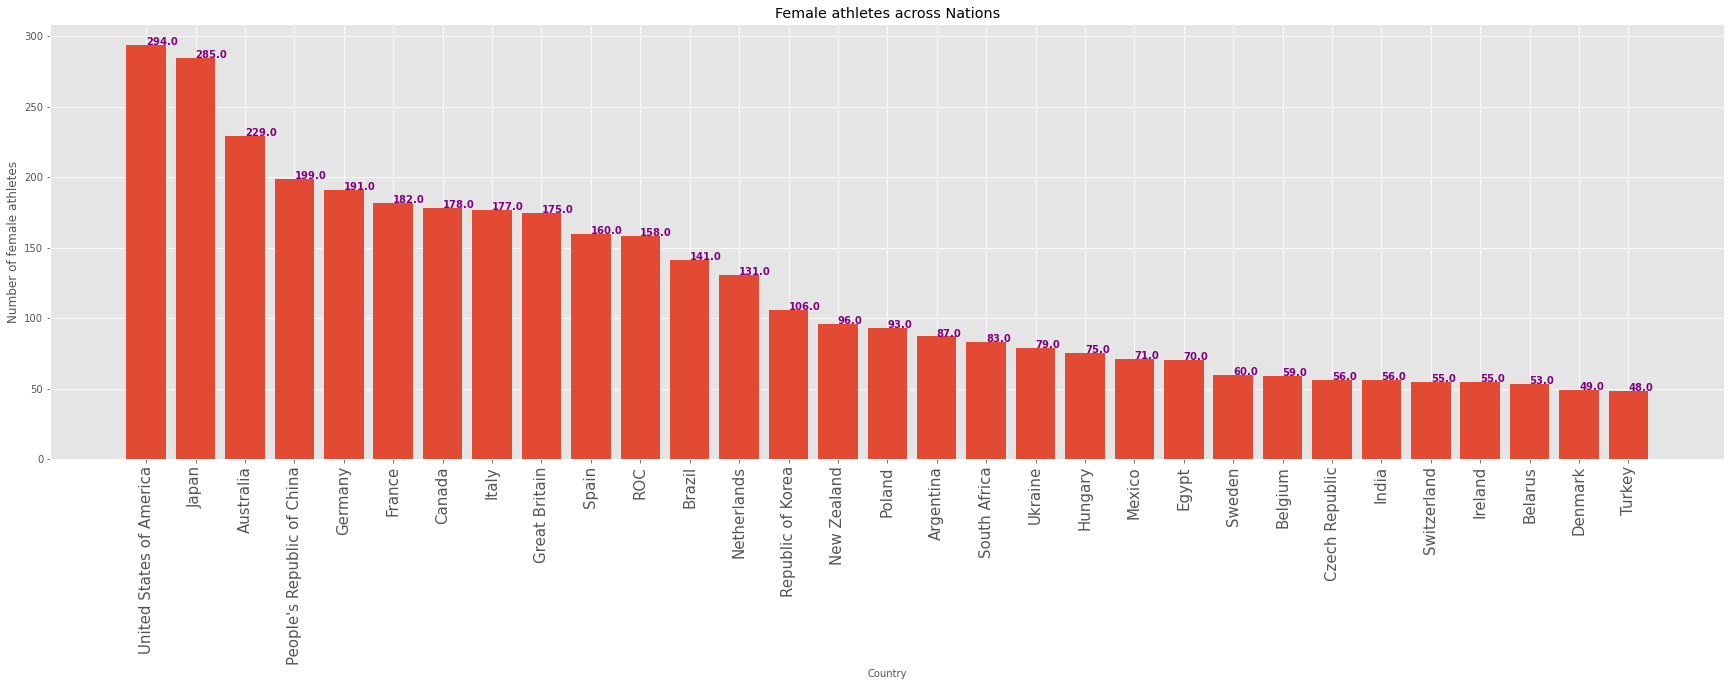

In [60]:
#plotting female athletes across countries, taking first 30 countries with the most female athletes
x = count_gender_final['NOC'].values[0:31]
y = count_gender_final['Number of female athletes'].values[0:31]
plt.figure(figsize=(30,8))
plt.bar(x,y)
for index, value in enumerate(y):
    plt.text(index, value, str(value),color='purple',size=10,fontweight='bold')
plt.xlabel('Country',size=10)
plt.ylabel('Number of female athletes')
plt.xticks(x,rotation='vertical',size=15)
plt.title('Female athletes across Nations')
plt.show()

### 3. Which country has the least female athletes?

In [61]:
count_gender_final.sort_values(by='Number of female athletes', ascending=False).tail()

,NOC,Number of female athletes
193,Myanmar,1.0
192,Lesotho,1.0
191,Vanuatu,1.0
190,Andorra,1.0
205,Tuvalu,1.0


In [62]:
#finding fewest female countries: take NOC on condition that number of female athletes is minimum
count_gender_final['NOC'][count_gender_final['Number of female athletes']==count_gender_final['Number of female athletes'].min()]

189            Saint Kitts and Nevis
190                          Andorra
191                          Vanuatu
192                          Lesotho
193                          Myanmar
194                       Mauritania
195                      South Sudan
196      United Republic of Tanzania
197                          Bermuda
198    St Vincent and the Grenadines
199                Brunei Darussalam
200                 Marshall Islands
201         Central African Republic
202                            Nauru
203                          Somalia
204                         Dominica
205                           Tuvalu
Name: NOC, dtype: object

### 4. Which sport is most popular (based on athletes counts)  and which country has the highest participants in it? Plot a descendingly ordered bar plot to show athlete counts in different sports? 

In [63]:
#count athletes on discipline, take top 1 from result
athlete_data.Discipline.value_counts().head(1)

Athletics    2068
Name: Discipline, dtype: int64

In [64]:
#take athletes participating in athletics by testing discipline, count athletes on country
athletics_data = team_data[(team_data['Discipline'] == 'Athletics')]
athletics_data['NOC'].value_counts().head(6)

United States of America    5
Germany                     5
Italy                       5
Netherlands                 5
Great Britain               5
Jamaica                     5
Name: NOC, dtype: int64

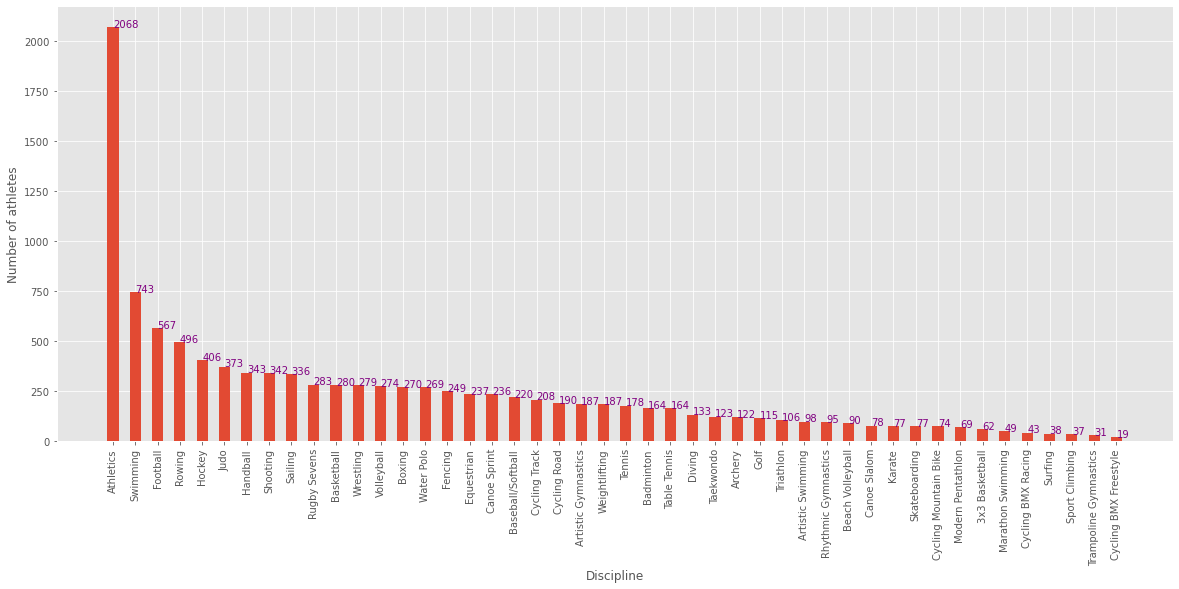

In [65]:
#plot number of athletes across disciplines
y = athlete_data.Discipline.value_counts().values
x = athlete_data.Discipline.value_counts().index
plt.figure(figsize=(20,8))
plt.bar(x,y,width=0.5)
for index, value in enumerate(y):
    plt.text(index, value, str(value),color='purple',size=10)
plt.xlabel('Discipline')
plt.ylabel('Number of athletes')
plt.xticks(rotation='vertical')
plt.show()

### 5. Plot a descendingly ordered categorical bar plot to show gender segregated athlete counts in different sports.

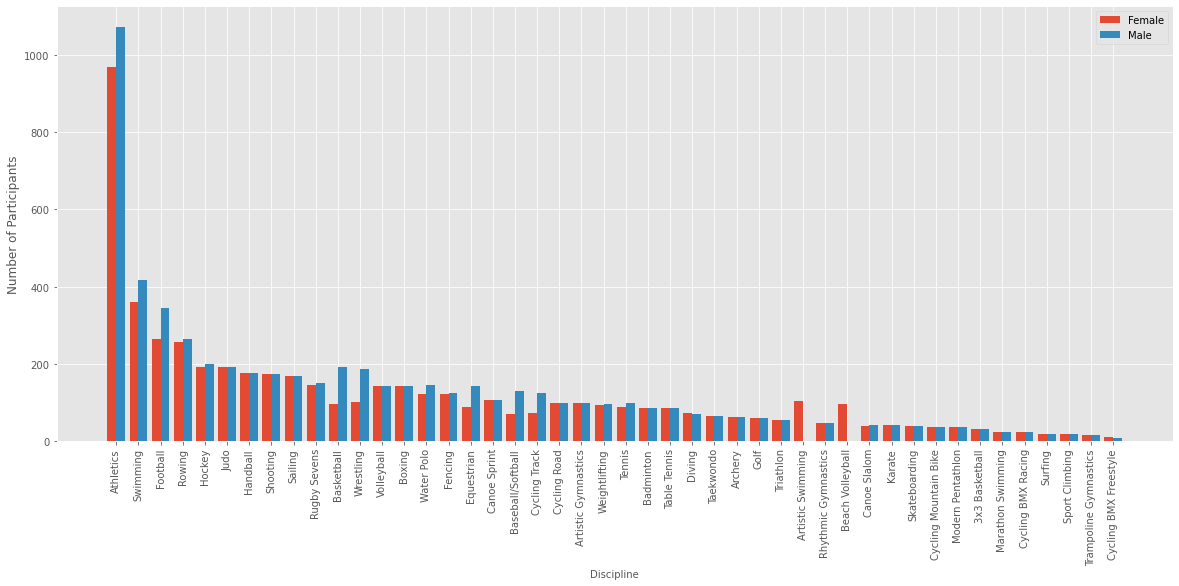

In [66]:
#create data for plotting, sort descendingly by total athletes and then by male athletes
cate_gender_data = gender_data.sort_values(by=['Total', 'Male'], ascending=False).reset_index().drop('index', axis=1)
female = cate_gender_data.Female
male = cate_gender_data.Male

plt.figure(figsize=(20,8))
X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, female, 0.4, label = 'Female')
plt.bar(X_axis + 0.2, male, 0.4, label = 'Male')
plt.xlabel('Discipline',size=10)
plt.ylabel('Number of Participants')
plt.xticks(X_axis,x,rotation='vertical')
plt.legend()
plt.show()

### 6. Which sport has the highest proportion of male to female athletes? Plot a descendingly ordered bar plot to depict male to female athletes proportion across different sports.

In [67]:
#create ratio column by calculating as below, sort by ratio & take maximum value
gender_data['Ratio'] = gender_data['Male'] / gender_data['Female']
gender_data.sort_values(by='Ratio', ascending=False).max()

Discipline           Wrestling
Female                     969
Male                      1072
Total                     2041
Female proportion          1.0
Ratio                 2.010417
dtype: object

### 7. Which country received most gold medals? Which recieved most silver and most bronze? Which received least for each? Use bar plot to for illustration.  

In [68]:
# rename column Team/NOC to Team
medal_data.rename(columns={'Team/NOC':'Team'},inplace=True) 
medal_data.head()

,Rank,Team,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [69]:
#finding country with most gold medals by taking team where gold is max
medal_data['Team'][medal_data['Gold']==medal_data['Gold'].max()]

0    United States of America
Name: Team, dtype: object

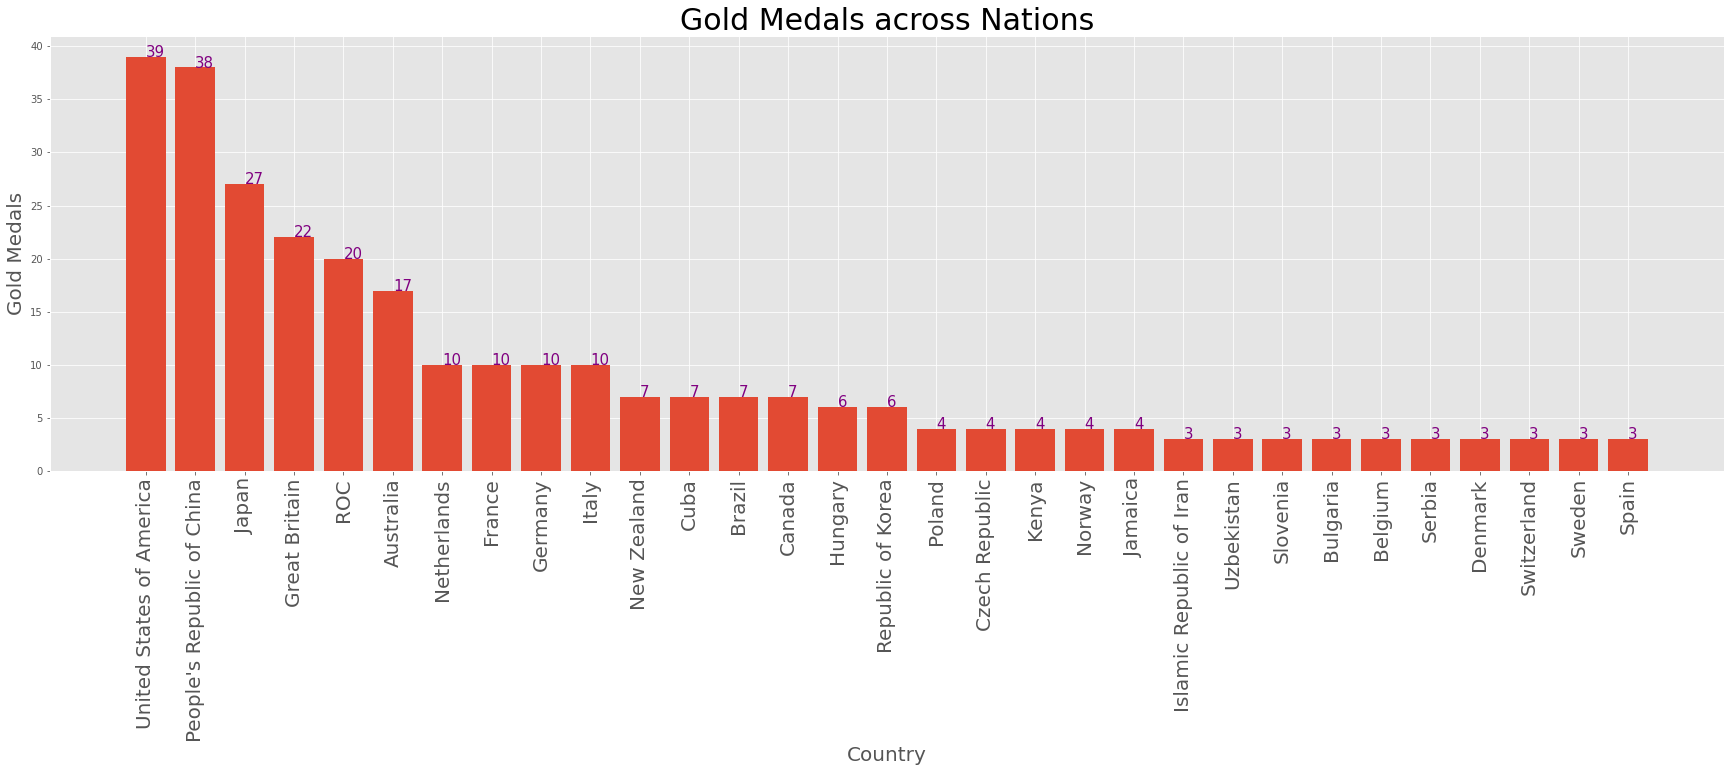

In [70]:
#plotting gold medals across nations
gold_medal_data = medal_data.sort_values(by='Gold', ascending=False)
x = gold_medal_data.Team.values[0:31]
y = gold_medal_data.Gold.values[0:31]
plt.figure(figsize=(30,8))
plt.bar(x,y)
for index, value in enumerate(y):
    plt.text(index, value, str(value), color='purple', size=15)
plt.xlabel('Country', size=20)
plt.ylabel('Gold Medals', size=20)
plt.xticks(x,rotation='vertical', size=20)
plt.title('Gold Medals across Nations', size=30)
plt.show()

In [71]:
#finding country with most silver medals by taking team where silver is max
medal_data['Team'][medal_data['Silver']==medal_data['Silver'].max()]

0    United States of America
Name: Team, dtype: object

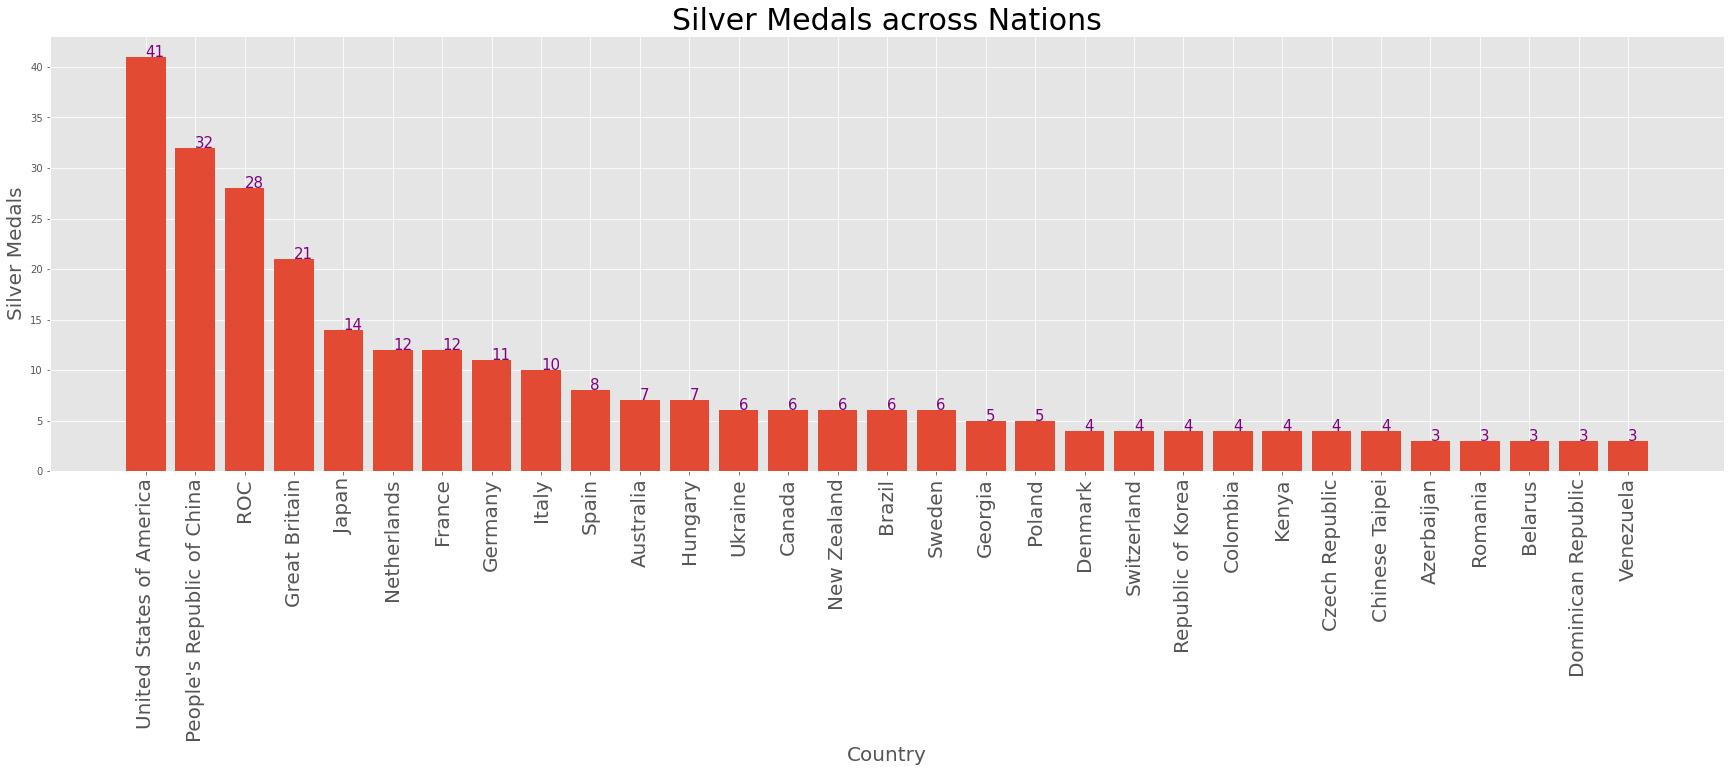

In [72]:
#plotting silver medals across nations
silver_medal_data = medal_data.sort_values(by='Silver', ascending=False)
x = silver_medal_data.Team.values[0:31]
y = silver_medal_data.Silver.values[0:31]
plt.figure(figsize=(30,8))
plt.bar(x,y)
for index, value in enumerate(y):
    plt.text(index, value, str(value), color='purple', size=15)
plt.xlabel('Country', size=20)
plt.ylabel('Silver Medals', size=20)
plt.xticks(x,rotation='vertical', size=20)
plt.title('Silver Medals across Nations', size=30)
plt.show()

In [73]:
#finding country with most bronze medals by taking team where bronze is max
medal_data['Team'][medal_data['Bronze']==medal_data['Bronze'].max()]

0    United States of America
Name: Team, dtype: object

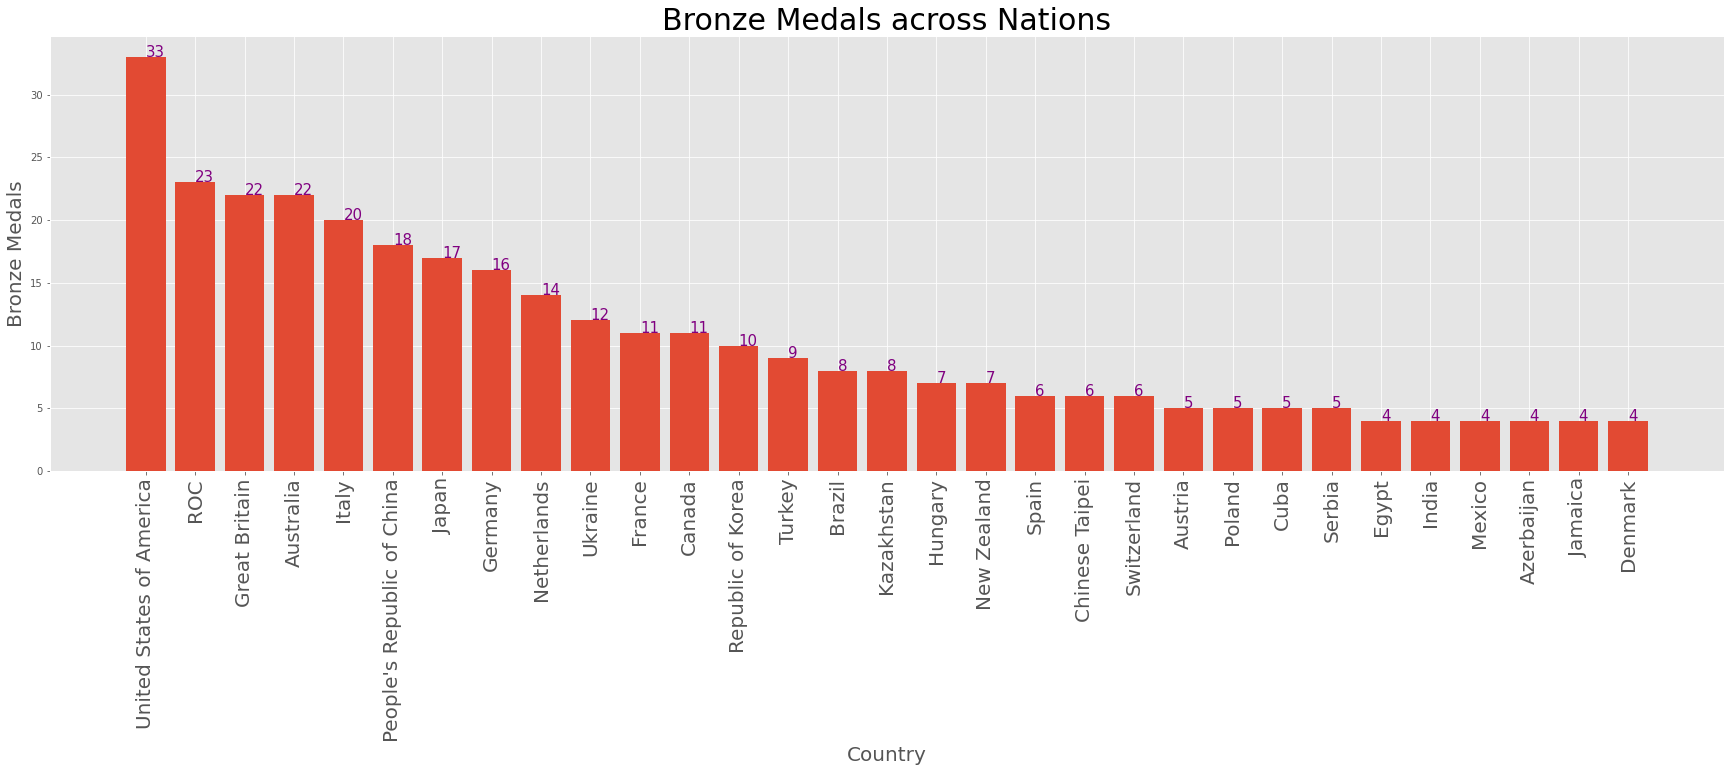

In [74]:
#plotting bronze medals across nations
bronze_medal_data = medal_data.sort_values(by='Bronze', ascending=False)
x = bronze_medal_data.Team.values[0:31]
y = bronze_medal_data.Bronze.values[0:31]
plt.figure(figsize=(30,8))
plt.bar(x,y)
for index, value in enumerate(y):
    plt.text(index, value, str(value), color='purple', size=15)
plt.xlabel('Country', size=20)
plt.ylabel('Bronze Medals', size=20)
plt.xticks(x,rotation='vertical', size=20)
plt.title('Bronze Medals across Nations', size=30)
plt.show()

### 8. Which country has the highest number of medals (Gold - Silver - Bronze) per capita (participants)? 

In [75]:
#create dataframe counting athletes across countries
country_athlete = athlete_data['NOC'].value_counts().rename_axis('Country').reset_index(name='Number of athletes')
country_athlete

,Country,Number of athletes
0,United States of America,615
1,Japan,586
2,Australia,470
3,People's Republic of China,401
4,Germany,400
...,...,...
201,United Republic of Tanzania,2
202,Saint Kitts and Nevis,2
203,Marshall Islands,2
204,Vanuatu,2


In [76]:
#create dataframe counting total medals across countries
team_medal = medal_data[['Team', 'Total']]
team_medal

,Team,Total
0,United States of America,113
1,People's Republic of China,88
2,Japan,58
3,Great Britain,65
4,ROC,71
...,...,...
88,Ghana,1
89,Grenada,1
90,Kuwait,1
91,Republic of Moldova,1


In [77]:
#join the above 2 dataframes on country, to get number of athletes & total medals
country_athlete_medal = pd.merge(country_athlete, team_medal, left_on='Country', right_on='Team', how='left').drop('Team', axis=1)
country_athlete_medal

,Country,Number of athletes,Total
0,United States of America,615,113.0
1,Japan,586,58.0
2,Australia,470,46.0
3,People's Republic of China,401,88.0
4,Germany,400,37.0
...,...,...,...
201,United Republic of Tanzania,2,NaN
202,Saint Kitts and Nevis,2,NaN
203,Marshall Islands,2,NaN
204,Vanuatu,2,NaN


In [78]:
#calculating medals per capita
country_athlete_medal['Medals per capita'] = country_athlete_medal['Total'] / country_athlete_medal['Number of athletes']
country_athlete_medal

,Country,Number of athletes,Total,Medals per capita
0,United States of America,615,113.0,0.183740
1,Japan,586,58.0,0.098976
2,Australia,470,46.0,0.097872
3,People's Republic of China,401,88.0,0.219451
4,Germany,400,37.0,0.092500
...,...,...,...,...
201,United Republic of Tanzania,2,NaN,NaN
202,Saint Kitts and Nevis,2,NaN,NaN
203,Marshall Islands,2,NaN,NaN
204,Vanuatu,2,NaN,NaN


In [79]:
country_athlete_medal.sort_values(by='Medals per capita', ascending=False).head(1)

,Country,Number of athletes,Total,Medals per capita
169,San Marino,4,3.0,0.75


### 9. List countries with no medals? 

In [80]:
#countries with no medals are not presented in medal_data, so after merging in question 8, these countries' medal-related numbers will be null
country_athlete_medal[country_athlete_medal['Total'].isna()].Country

50                           Chile
60                         Algeria
66                      Montenegro
68                            Peru
71             Trinidad and Tobago
                  ...             
201    United Republic of Tanzania
202          Saint Kitts and Nevis
203               Marshall Islands
204                        Vanuatu
205                    South Sudan
Name: Country, Length: 113, dtype: object

### 10. Which country had the greatest number of coaches. Plot a descendingly ordered bar plot to show coach counts in different countries. 

In [81]:
#calculate coaches across countries, take top 1 from result
coach_data.NOC.value_counts().head(1)

Japan    35
Name: NOC, dtype: int64

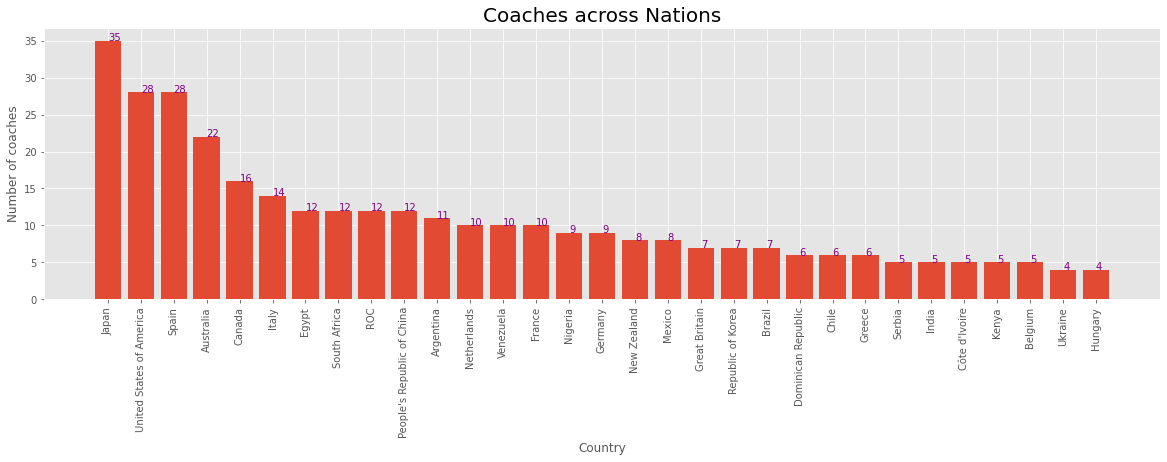

In [82]:
#plotting coaches across countries
y = coach_data.NOC.value_counts().values[0:31]
x = coach_data.NOC.value_counts().index[0:31]
plt.figure(figsize=(20,5))
plt.bar(x,y)
for index, value in enumerate(y):
    plt.text(index, value, str(value), color='purple', size=10)
plt.xlabel('Country')
plt.ylabel('Number of coaches')
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=10)
plt.title('Coaches across Nations', size=20)
plt.show()

### 11. Plot a descendingly ordered bar plot to show coach counts across different sports.  

In [83]:
coach_data

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN
...,...,...,...,...
389,ZAMORA PEDREIRA Javier,Spain,Basketball,NaN
390,ZAMPIERI Francesca,Liechtenstein,Artistic Swimming,Duet
391,ZHANG Xiaohuan,People's Republic of China,Artistic Swimming,NaN
392,ZIJP Simon,Netherlands,Hockey,NaN


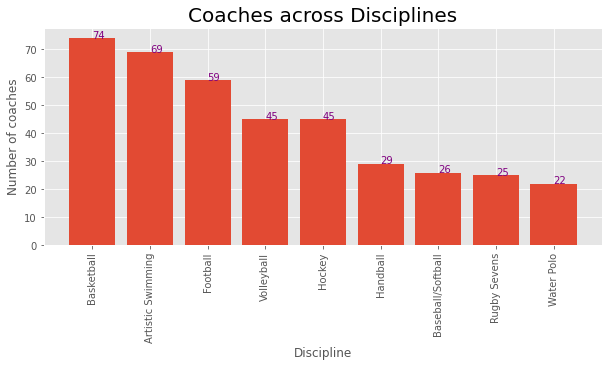

In [84]:
#plotting coaches across disciplines
y = coach_data.Discipline.value_counts().values
x = coach_data.Discipline.value_counts().index
plt.figure(figsize=(10,4))
plt.bar(x,y)
for index, value in enumerate(y):
    plt.text(index, value, str(value), color='purple', size=10)
plt.xlabel('Discipline')
plt.ylabel('Number of coaches')
plt.xticks(rotation='vertical',size=10)
plt.yticks(size=10)
plt.title('Coaches across Disciplines', size=20)
plt.show()

### 12. Identify the most popular coach, female and male athlete first name? 

In [85]:
#make a list of all coaches' fullnames by taking column 'Name' and applying to_list
coach_full = []
for i in coach_data['Name'].to_list():
    coach_full.append(i.split())
    
#assume first name is the last word of fullname, make a list of all coaches' first names by taking the last element after splitting fullname
coach_first = []
for j in coach_full:
    coach_first.append(j[-1])
    
#make dataframe from dictionary of name & frequency, transpose it because it just makes sense that way, reset index and name columns
coach_first_count = pd.DataFrame([{x:coach_first.count(x) for x in coach_first}]).transpose().reset_index()
coach_first_count.columns = ['Name', 'Frequency']

#sort above dataframe by frequency, taking more than 1 because there might be more than 1 name with max frequency
coach_first_count.sort_values(by='Frequency', ascending=False).reset_index().drop(['index'], axis=1).head()

,Name,Frequency
0,Jose,5
1,David,5
2,John,4
3,Anthony,4
4,Angel,4


In [86]:
#make a list of all athletes' fullnames by taking column 'Name' and applying to_list
athlete_full = []
for i in athlete_data['Name'].to_list():
    athlete_full.append(i.split())
    
#assume first name is the last word of fullname, make a list of all athletes' first names by taking the last element after splitting fullname
athlete_first = []
for j in athlete_full:
    athlete_first.append(j[-1])
    
#make dataframe from dictionary of name & frequency, transpose it because it just makes sense that way, reset index and name columns
athlete_first_count = pd.DataFrame([{x:athlete_first.count(x) for x in athlete_first}]).transpose().reset_index()
athlete_first_count.columns = ['Name', 'Frequency']

#sort above dataframe by frequency, taking more than 1 because there might be more than 1 name with max frequency
athlete_first_count.sort_values(by='Frequency', ascending=False).reset_index().drop(['index'], axis=1).head()

,Name,Frequency
0,Anna,56
1,Maria,51
2,Daniel,43
3,David,43
4,Laura,40


# Section 3:  (Show Analysis) - (Weighting = 20%)

Based on the provided show dataset, please answer the following questions: 

In [87]:
#this section is not commented because the codes are straight-forward going exactly as the questions require

### 1. Import the dataset in to your workspace as a data frame.

In [88]:
show = pd.read_csv('Dataset/show.csv')
show

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


### 2. Remove all duplicates and perform normal cleaning procedure if needed.

In [89]:
show.drop_duplicates()
show.reset_index().drop('index', axis=1)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [90]:
show[show.isin({0})].count() 

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [91]:
show.isna().sum() 

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

### 3. Changing datatype of date_added column to datetime so you can conduct time based analysis.

In [92]:
show.date_added = show.date_added.astype('datetime64[ns]')
show.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

### 4. Create 3 separate columns for week-day, month, and year based on the date_added column and name them month_added,	year_added, and	day_added respectively. 

In [93]:
show['year_added'] = show['date_added'].dt.year
show['month_added'] = show['date_added'].dt.month
show['day_added'] = show['date_added'].dt.weekday
show

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,5
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,4
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,4
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,2
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017,1,1
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018,9,3
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016,12,3
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018,6,5


### 5. Group shows by their type and display the frequency of each type. Also, use a piechart to display show type percentage.

In [94]:
type_ratio = show.groupby('type').count()['show_id']
type_ratio

type
Movie      6126
TV Show    2664
Name: show_id, dtype: int64

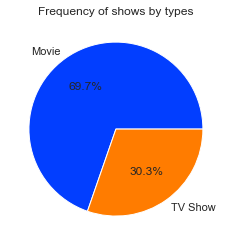

In [95]:
palette_color = sns.color_palette('bright')
sns.set(rc={'figure.facecolor':'white'})
plt.pie(type_ratio.values, labels=type_ratio.index, colors=palette_color, autopct='%.1f%%')
plt.title('Frequency of shows by types')
plt.show()

### 6. Display the number of shows that each director has ever directed along with the show type. 

In [96]:
show.groupby(['director', 'type']).count()['show_id']

director             type 
A. L. Vijay          Movie    2
A. Raajdheep         Movie    1
A. Salaam            Movie    1
A.R. Murugadoss      Movie    2
Aadish Keluskar      Movie    1
                             ..
Çagan Irmak          Movie    1
Ísold Uggadóttir     Movie    1
Óskar Thór Axelsson  Movie    1
Ömer Faruk Sorak     Movie    2
Şenol Sönmez         Movie    2
Name: show_id, Length: 4581, dtype: int64

### 7. Display the top 10 most active directors. 

In [97]:
show[show.director!='Not Given'].groupby('director').count().sort_values(by='show_id', ascending=False).head(10)['show_id']

director
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Name: show_id, dtype: int64

### 8. Group shows based on country and type. Display their frequency too. 

In [98]:
show.groupby(['country', 'type']).count()['show_id']

country       type   
Argentina     Movie      56
              TV Show    20
Australia     Movie      61
              TV Show    53
Austria       Movie       8
                         ..
Uruguay       TV Show     1
Venezuela     Movie       2
Vietnam       Movie       7
West Germany  Movie       1
Zimbabwe      Movie       1
Name: show_id, Length: 138, dtype: int64

### 9. Identify countries with the highest number of show production (top 10). Display their show production frequency too. Beside table, use bar plot to articulate your findings.

In [99]:
q9 = show[show.country!='Not Given'].groupby('country').count().sort_values(by='show_id', ascending=False).head(10)['show_id'].reset_index()
q9

,country,show_id
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Canada,271
5,Japan,259
6,South Korea,214
7,France,213
8,Spain,182
9,Mexico,138


Text(0.5, 1.0, 'Frequency of shows by country')

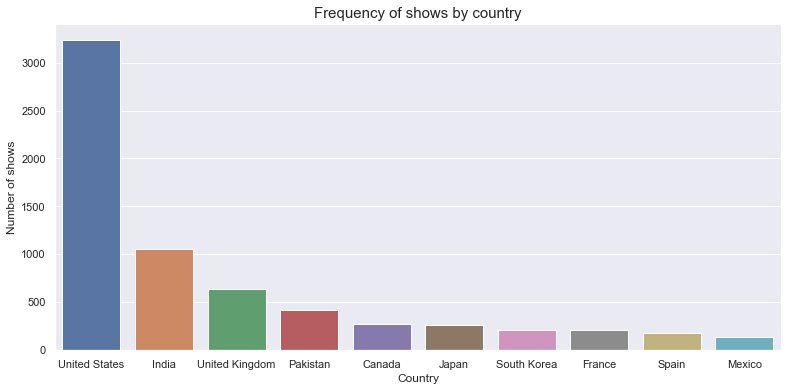

In [100]:
plt.figure(figsize=(13,6))
sns.barplot(data=q9, x=q9.country , y=q9.show_id)
plt.xlabel('Country')
plt.ylabel('Number of shows')
plt.title('Frequency of shows by country', size=15)

### 10. Group shows based on the listed_in (genre) feature. Display their frequency too.

In [101]:
show.groupby('listed_in').count()['show_id']

listed_in
Action & Adventure                                              128
Action & Adventure, Anime Features                                1
Action & Adventure, Anime Features, Children & Family Movies      4
Action & Adventure, Anime Features, Classic Movies                2
Action & Adventure, Anime Features, Horror Movies                 1
                                                               ... 
TV Horror, TV Mysteries, Teen TV Shows                            1
TV Horror, Teen TV Shows                                          2
TV Sci-Fi & Fantasy, TV Thrillers                                 1
TV Shows                                                         16
Thrillers                                                        65
Name: show_id, Length: 513, dtype: int64

### 11. Identify the top 10 most popular genre based on the listed_in feature.

In [102]:
show.groupby('listed_in').count().sort_values(by='show_id', ascending=False).head(10)['show_id']

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: show_id, dtype: int64

### 12. Use line plot to display show frequency per year segregated by show type. 

In [103]:
q12 = show.groupby(['year_added', 'type']).count()['show_id'].reset_index()
q12

,year_added,type,show_id
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


Text(0, 0.5, 'Number of shows')

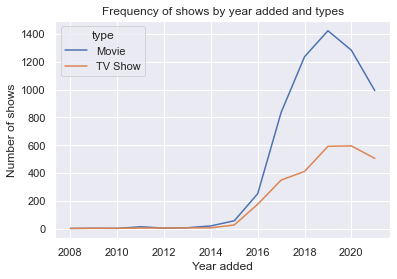

In [104]:
sns.lineplot(data=q12, x=q12.year_added, y=q12.show_id, hue=q12.type)
plt.title('Frequency of shows by year added and types')
plt.xlabel('Year added')
plt.ylabel('Number of shows')

# Section 4:  (Chessboard) - (Weighting = 10%)

A chessboard is an eight-by-eight grid of squares. A queen is a chess piece that can
move on the chessboard any number of squares along any row, column, or diagonal.
A queen is attacking another piece if in a single move, it can move to the square the
piece is on without jumping over any other piece. (In other words, if the other piece is
in the line of sight of the queen, then it is attacked by it.) The eight queens problem
poses the question of how eight queens can be placed on a chessboard without any
queen attacking another queen.

![queens](queen.png)

To represent squares on the chessboard, we will assign each an integer row and an
integer column. We can ensure each of the eight queens is not on the same column
by simply assigning them sequentially the columns 1 through 8. The variables in our
constraint-satisfaction problem can just be the column of the queen in question. The
domains can be the possible rows (again, 1 through 8).

### Write a piece of code that prints out all the possible arrangements of eight queens on the chessboard. 
**Important:** Your code must be fully commented. 


In [105]:
Queens = 8  # number of queens we are solving for

currentSolution = [0 for x in range(Queens)]  #hold current testing data
solutions = []  #number of found solutions


def isSafe(testRow, testCol):
    # no need to check for row 0
    if testRow == 0:
        return True
    
    for row in range(0, testRow):
        #check vertical 
        if testCol == currentSolution[row]:
            return False
        #check diagonal
        if abs(testRow - row) == abs(testCol - currentSolution[row]):
            return False
    #if no attack found
    return True

#The idea is to place a queen on each row. One by one, after placing, run loop on the next row to find the first safe position.

for queen0 in range(Queens):
    if not isSafe(0, queen0):
        continue
    else:
        currentSolution[0] = queen0

    for queen1 in range(Queens):
        if not isSafe(1, queen1):
            continue
        else:
            currentSolution[1] = queen1

        for queen2 in range(Queens):
            if not isSafe(2, queen2):
                continue
            else:
                currentSolution[2] = queen2

            for queen3 in range(Queens):
                if not isSafe(3, queen3):
                    continue
                else:
                    currentSolution[3] = queen3

                for queen4 in range(Queens):
                    if not isSafe(4, queen4):
                        continue
                    else:
                        currentSolution[4] = queen4

                    for queen5 in range(Queens):
                        if not isSafe(5, queen5):
                            continue
                        else:
                            currentSolution[5] = queen5

                        for queen6 in range(Queens):
                            if not isSafe(6, queen6):
                                continue
                            else:
                                currentSolution[6] = queen6

                            for queen7 in range(Queens):
                                if not isSafe(7, queen7):
                                    continue
                                else:
                                    currentSolution[7] = queen7
                                    solutions.append(currentSolution.copy())

print(len(solutions), ' solutions found')
for solution in solutions:
    print(solution)

92  solutions found
[0, 4, 7, 5, 2, 6, 1, 3]
[0, 5, 7, 2, 6, 3, 1, 4]
[0, 6, 3, 5, 7, 1, 4, 2]
[0, 6, 4, 7, 1, 3, 5, 2]
[1, 3, 5, 7, 2, 0, 6, 4]
[1, 4, 6, 0, 2, 7, 5, 3]
[1, 4, 6, 3, 0, 7, 5, 2]
[1, 5, 0, 6, 3, 7, 2, 4]
[1, 5, 7, 2, 0, 3, 6, 4]
[1, 6, 2, 5, 7, 4, 0, 3]
[1, 6, 4, 7, 0, 3, 5, 2]
[1, 7, 5, 0, 2, 4, 6, 3]
[2, 0, 6, 4, 7, 1, 3, 5]
[2, 4, 1, 7, 0, 6, 3, 5]
[2, 4, 1, 7, 5, 3, 6, 0]
[2, 4, 6, 0, 3, 1, 7, 5]
[2, 4, 7, 3, 0, 6, 1, 5]
[2, 5, 1, 4, 7, 0, 6, 3]
[2, 5, 1, 6, 0, 3, 7, 4]
[2, 5, 1, 6, 4, 0, 7, 3]
[2, 5, 3, 0, 7, 4, 6, 1]
[2, 5, 3, 1, 7, 4, 6, 0]
[2, 5, 7, 0, 3, 6, 4, 1]
[2, 5, 7, 0, 4, 6, 1, 3]
[2, 5, 7, 1, 3, 0, 6, 4]
[2, 6, 1, 7, 4, 0, 3, 5]
[2, 6, 1, 7, 5, 3, 0, 4]
[2, 7, 3, 6, 0, 5, 1, 4]
[3, 0, 4, 7, 1, 6, 2, 5]
[3, 0, 4, 7, 5, 2, 6, 1]
[3, 1, 4, 7, 5, 0, 2, 6]
[3, 1, 6, 2, 5, 7, 0, 4]
[3, 1, 6, 2, 5, 7, 4, 0]
[3, 1, 6, 4, 0, 7, 5, 2]
[3, 1, 7, 4, 6, 0, 2, 5]
[3, 1, 7, 5, 0, 2, 4, 6]
[3, 5, 0, 4, 1, 7, 2, 6]
[3, 5, 7, 1, 6, 0, 2, 4]
[3, 5, 7, 2, 0, 6, 4, 1]
[3, 6

# Section 5:  (Encryption) - (Weighting = 10%)

Encryption is the method by which information is converted into secret code that hides the information's true meaning. The science of encrypting and decrypting information is called cryptography.

In computing, unencrypted data is also known as plaintext, and encrypted data is called ciphertext. The formulas used to encode and decode messages are called encryption algorithms

In this task you need to create a simple transposition encryption algorithms where plaintext characters are re-arranged instead of replaced to encode a message. This algorithm  encodes a message by writing it down and up diagonally over successive rows as illustrated below. For example, the secret message **“THIS IS A SECRET MESSAGE”** encoded over 4 rails would look like this:

![queens](cipher.png)

We then create the ciphertext by reading off characters left to right, top to bottom. For our example message, the cipher text becomes:

**TATGHSSEMAEIIERESSCS**

Write a piece of code capable of **encrypting** and **decrypting** a message using the aforementioned technique.  Use the last digit (most right) of your **SID** as the encryption key. 

Sample input plainText: **You speak an infinite deal of nothing.**

In [106]:
#input plaintext & number of rows (keys), number of columns is number of characters in the text
def encrypting(text, key):
 
    #create matrix to cipher
    #plaintext key = number of rows = last digit of my SID 2179088 = 8
    #length(text) = number of columns
    #filling the rail matrix to distinguish filled spaces from blank ones
    rail = [['\n' for i in range(len(text))]
                  for j in range(key)]
    #to find the direction
    drt_down = False
    row, col = 0, 0
     
    for i in range(len(text)):
        #check the direction of flow
        #reverse the direction if the top or bottom rail's just been filled
        if (row == 0) or (row == key - 1):
            drt_down = not drt_down
         
        #fill the corresponding alphabet
        rail[row][col] = text[i]
        col += 1
         
        #find the next row using direction flag
        if drt_down:
            row += 1
        else:
            row -= 1
    #construct the cipher using the rail matrix
    result = []
    for i in range(key):
        for j in range(len(text)):
            if rail[i][j] != '\n':
                result.append(rail[i][j])
    return('' . join(result))
     

def decrypting(cipher, key):
 
    #create the matrix to cipher
    #plain text key = rows ,
    #length(text) = columns
    #fill the rail matrix to distinguish filled spaces from blank ones
    rail = [['\n' for i in range(len(cipher))]
                  for j in range(key)]
     
    #find the direction
    drt_down = None
    row, col = 0, 0
     
    #mark the places with '*'
    for i in range(len(cipher)):
        if row == 0:
            drt_down = True
        if row == key - 1:
            drt_down = False
         
        #place the marker
        rail[row][col] = '*'
        col += 1
         
        #find the next row
        #using direction flag
        if drt_down:
            row += 1
        else:
            row -= 1
             
    #now we can construct the fill the rail matrix
    index = 0
    for i in range(key):
        for j in range(len(cipher)):
            if ((rail[i][j] == '*') and
               (index < len(cipher))):
                rail[i][j] = cipher[index]
                index += 1
         
    #now read the matrix in zig-zag manner to construct the resultant text
    result = []
    row, col = 0, 0
    for i in range(len(cipher)):
         
        #check the direction of flow
        if row == 0:
            drt_down = True
        if row == key-1:
            drt_down = False
             
        #place the marker
        if (rail[row][col] != '*'):
            result.append(rail[row][col])
            col += 1
             
        #find the next row using direction flag
        if drt_down:
            row += 1
        else:
            row -= 1
    return("".join(result))
 

if __name__ == "__main__":
    print(encrypting("You speak an infinite deal of nothing.", 8))
    print(decrypting("Ynfoifo u i n nnlosaiatp teh.ekediga n", 8))
 

Ynfoifo u i n nnlosaiatp teh.ekediga n
You speak an infinite deal of nothing.


## Good Luck!